In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from __future__ import division, print_function, unicode_literals #py2 and py3
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.metrics import *
pd.__version__
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Primera Entrega

In [ ]:
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv", sep=',')
dataset = pd.read_csv("/home/luis/Downloads/dataset_olympics.csv", sep=',')
dataset.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
dataset.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
dataset = dataset.fillna(0)
dataset.replace({'Sex':{'M': 0, 'F': 1}}, inplace=True)
dataset.replace({'Medal':{'Bronze': 1, 'Silver': 2, 'Gold': 3}}, inplace=True)
dataset.replace({'Season':{'Summer': 0, 'Winter': 1}}, inplace=True)
k = 0
for i in dataset.City.unique():
  dataset.City.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Sport.unique():
  dataset.Sport.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Games.unique():
  dataset.Games.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Event.unique():
  dataset.Event.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Team.unique():
  dataset.Team.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.NOC.unique():
  dataset.NOC.replace(i, k, inplace = True)
  k = k+1
dataset.drop('Name', inplace=True, axis=1)
#dataset.drop('Sport', inplace=True, axis=1)
#dataset.drop('Event', inplace=True, axis=1)
#dataset.drop('NOC', inplace=True, axis=1)
dataset.head(10)

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,0,24.0,180.0,80.0,0,0,0,1992,0,0,0,0,0
1,2,0,23.0,170.0,60.0,0,0,1,2012,0,1,1,1,0
2,3,0,24.0,0.0,0.0,1,1,2,1920,0,2,2,2,0
3,4,0,34.0,0.0,0.0,2,1,3,1900,0,3,3,3,3
4,5,1,21.0,185.0,82.0,3,2,4,1988,1,4,4,4,0
5,5,1,21.0,185.0,82.0,3,2,4,1988,1,4,4,5,0
6,5,1,25.0,185.0,82.0,3,2,5,1992,1,5,4,4,0
7,5,1,25.0,185.0,82.0,3,2,5,1992,1,5,4,5,0
8,5,1,27.0,185.0,82.0,3,2,6,1994,1,6,4,4,0
9,5,1,27.0,185.0,82.0,3,2,6,1994,1,6,4,5,0


<Axes: >

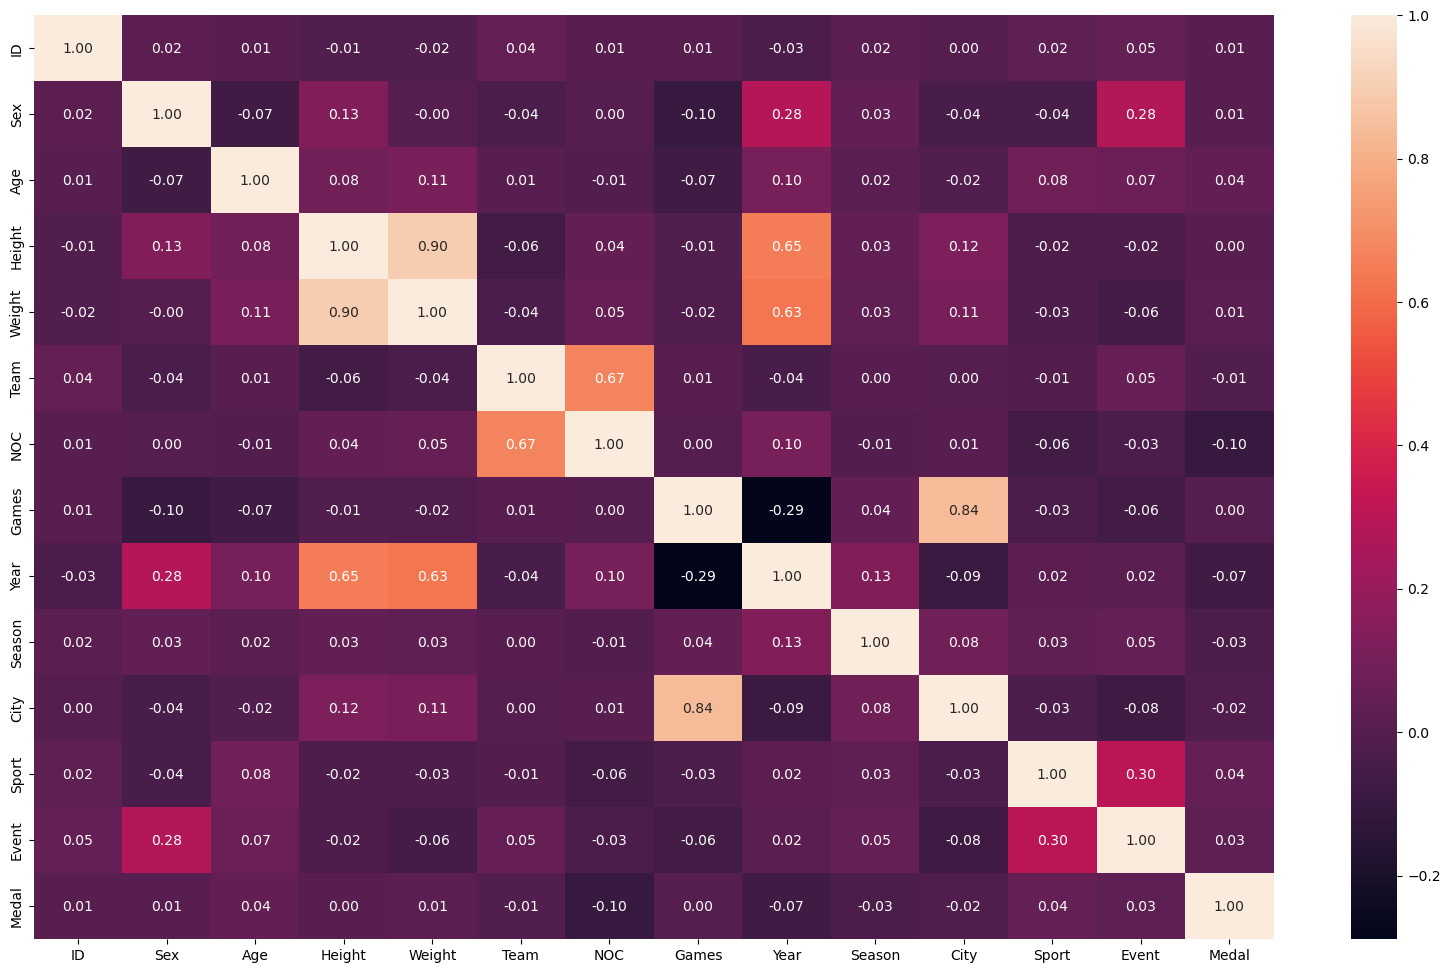

In [ ]:
corr = dataset.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt=".2f")

/home/luis/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


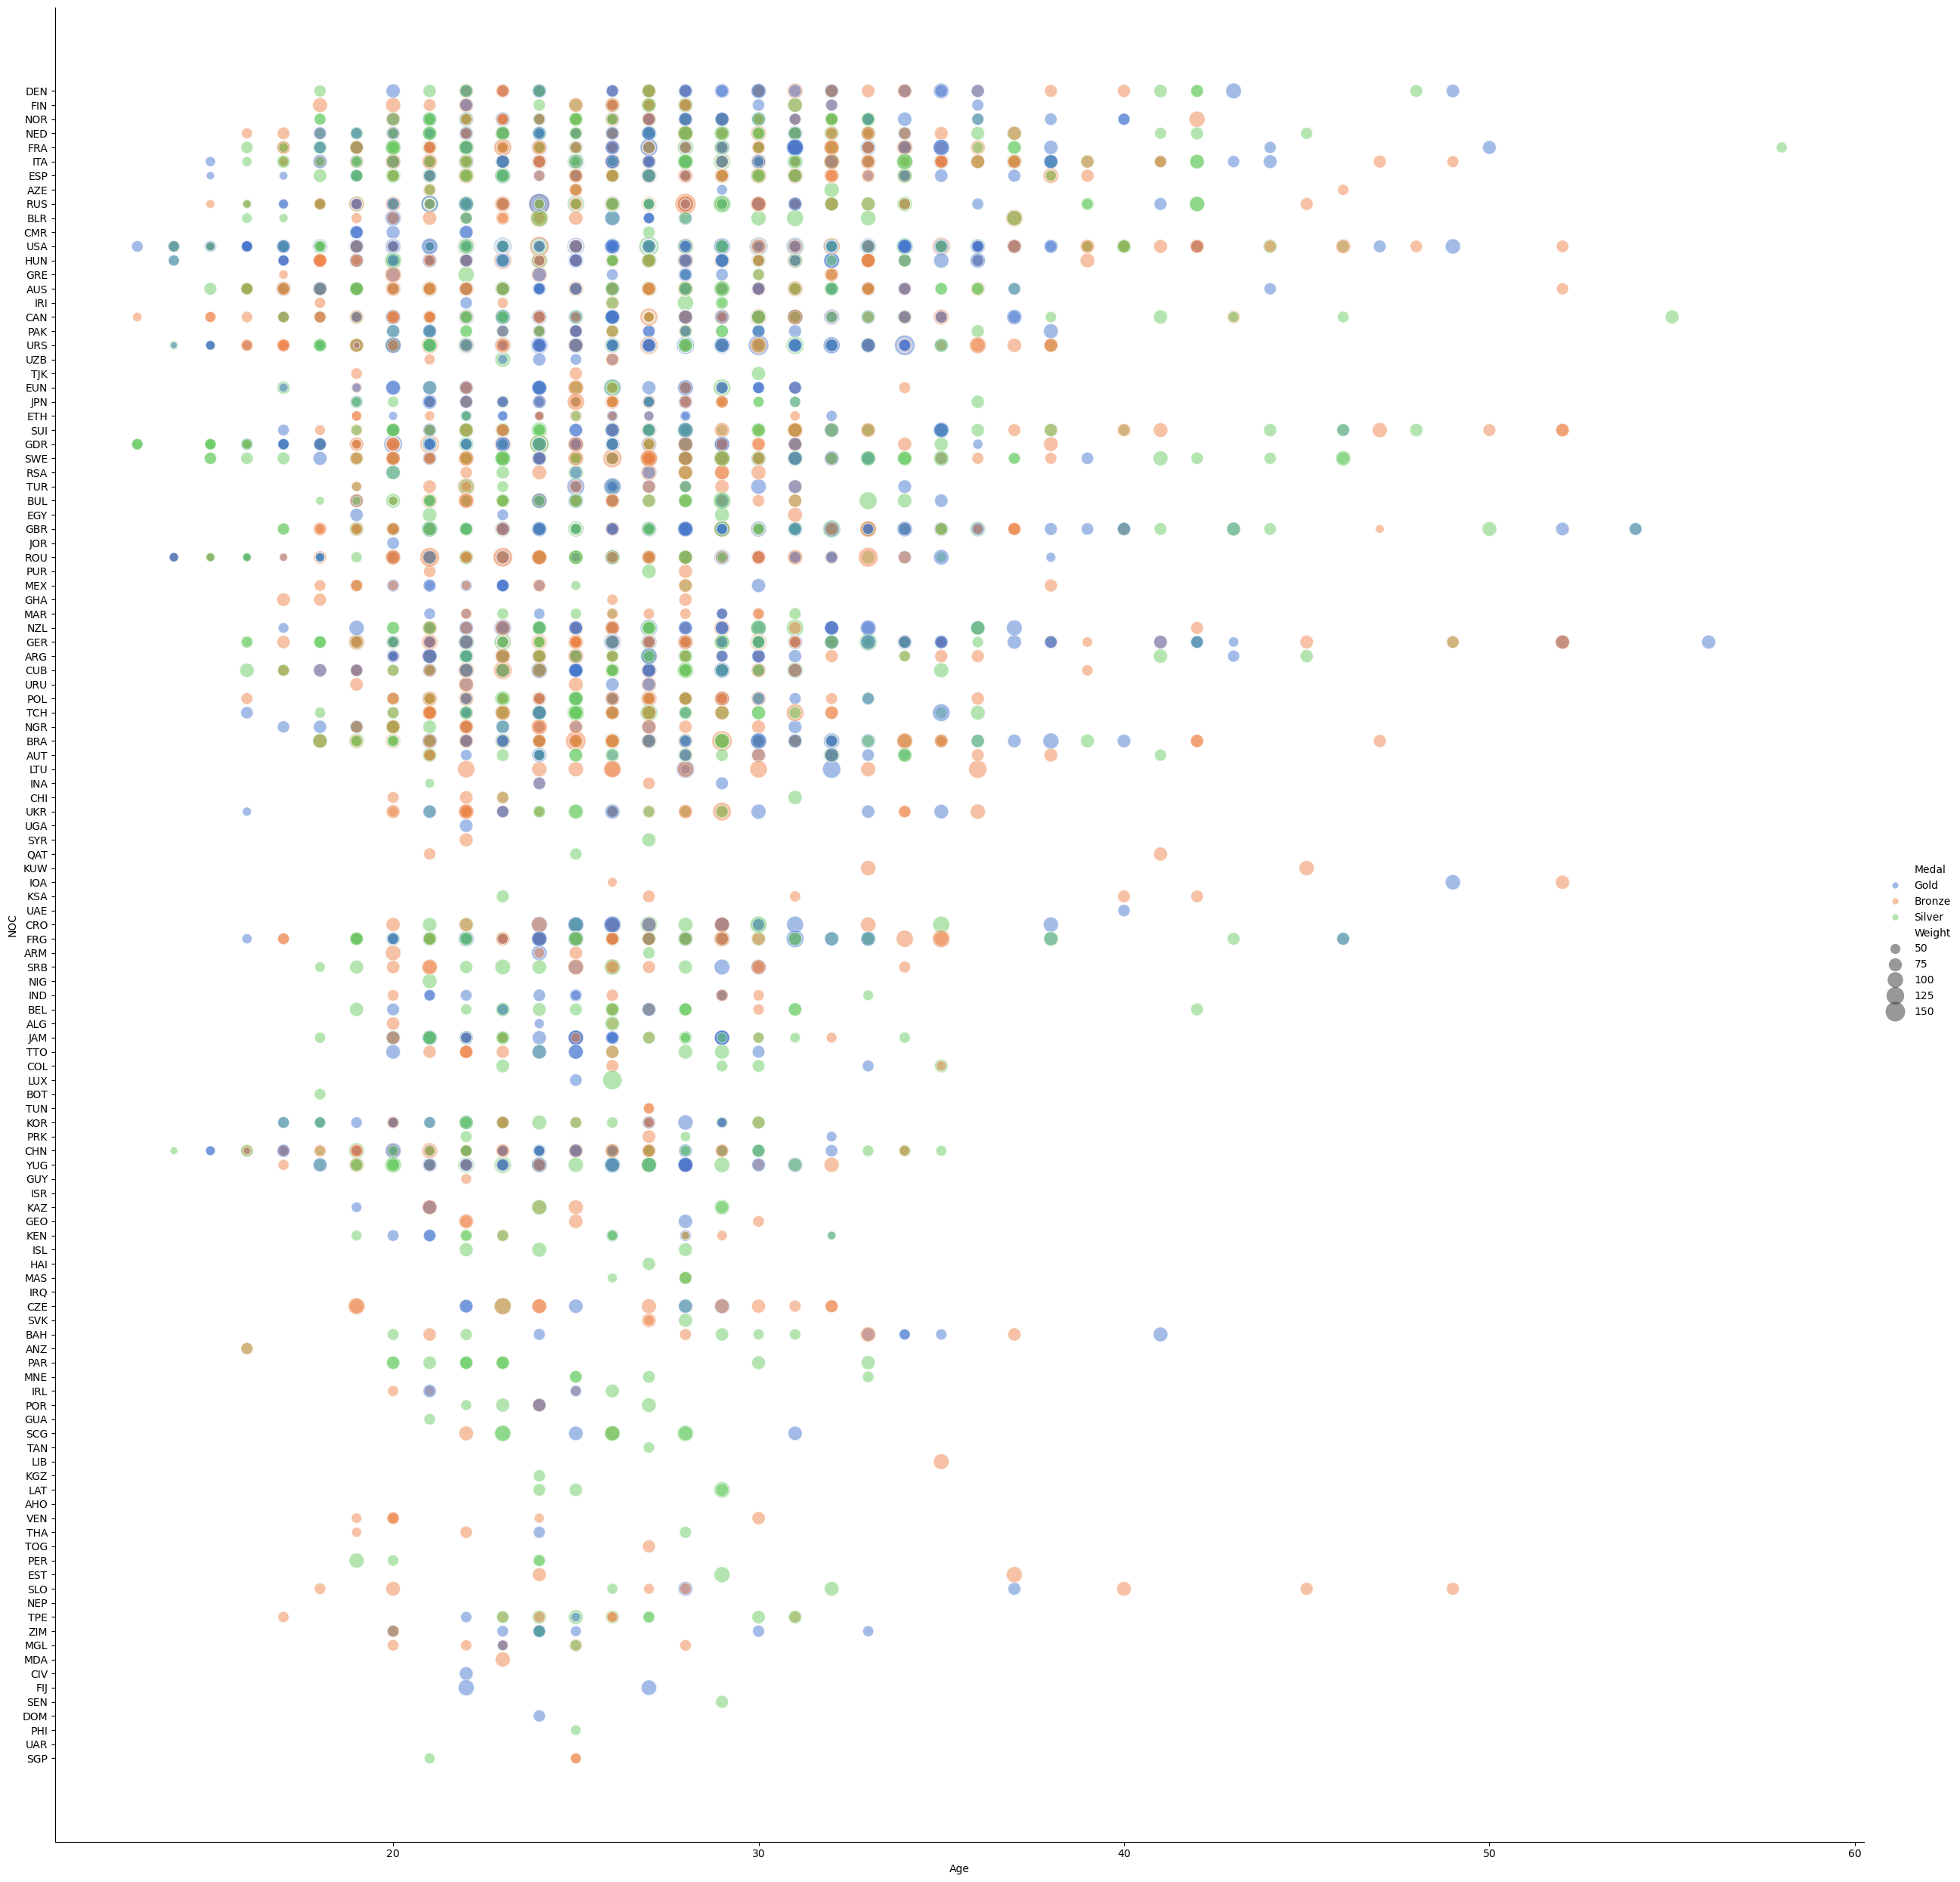

In [ ]:
dataset = pd.read_csv("/home/luis/Downloads/dataset_olympics.csv", sep=',')
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv", sep=',')
dataset = dataset.loc[dataset["Medal"].notna() & (dataset["Medal"] != 0)]
dataset = dataset[dataset["Age"] != 0.0]

sns.relplot(x="Age", y="NOC", hue="Medal", size="Weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=25, aspect=1, data=dataset)

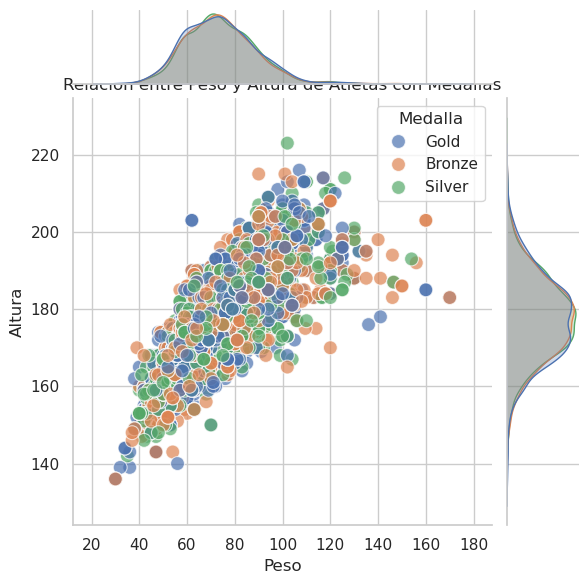

In [ ]:
dataset = pd.read_csv("/home/luis/Downloads/dataset_olympics.csv", sep=',')
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv")


dataset_with_medals = dataset[dataset["Medal"].notna()]


sns.set(style="whitegrid")
g = sns.jointplot(x="Weight", y="Height", data=dataset_with_medals, hue="Medal", alpha=0.7, s=100)


g.ax_joint.set_xlabel("Peso")
g.ax_joint.set_ylabel("Altura")
g.ax_joint.set_title("Relación entre Peso y Altura de Atletas con Medallas")
g.ax_joint.legend(title="Medalla", loc="upper right")

plt.show()

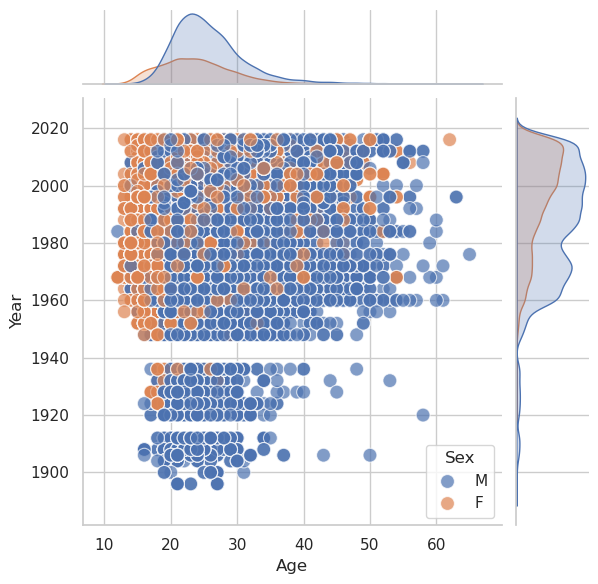

In [ ]:
dataset = pd.read_csv("/home/luis/Downloads/dataset_olympics.csv", sep=',')
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv")
dataset.replace({'Medal':{'Bronze': 1, 'Silver': 2, 'Gold': 3}}, inplace=True)
dataset = dataset.fillna(0)

indices_a_eliminar = dataset[dataset["Age"] == 0].index
dataset = dataset.drop(indices_a_eliminar)
indices_a_eliminar = dataset[dataset["Weight"] == 0].index
dataset = dataset.drop(indices_a_eliminar)
indices_a_eliminar = dataset[dataset["Height"] == 0].index
dataset = dataset.drop(indices_a_eliminar)

g = sns.jointplot(x="Age", y="Year", data=dataset, hue="Sex", alpha=0.7, s=100)

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_214/2880152215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sport", y="Height", data=dataset_with_medals, palette="Set2")


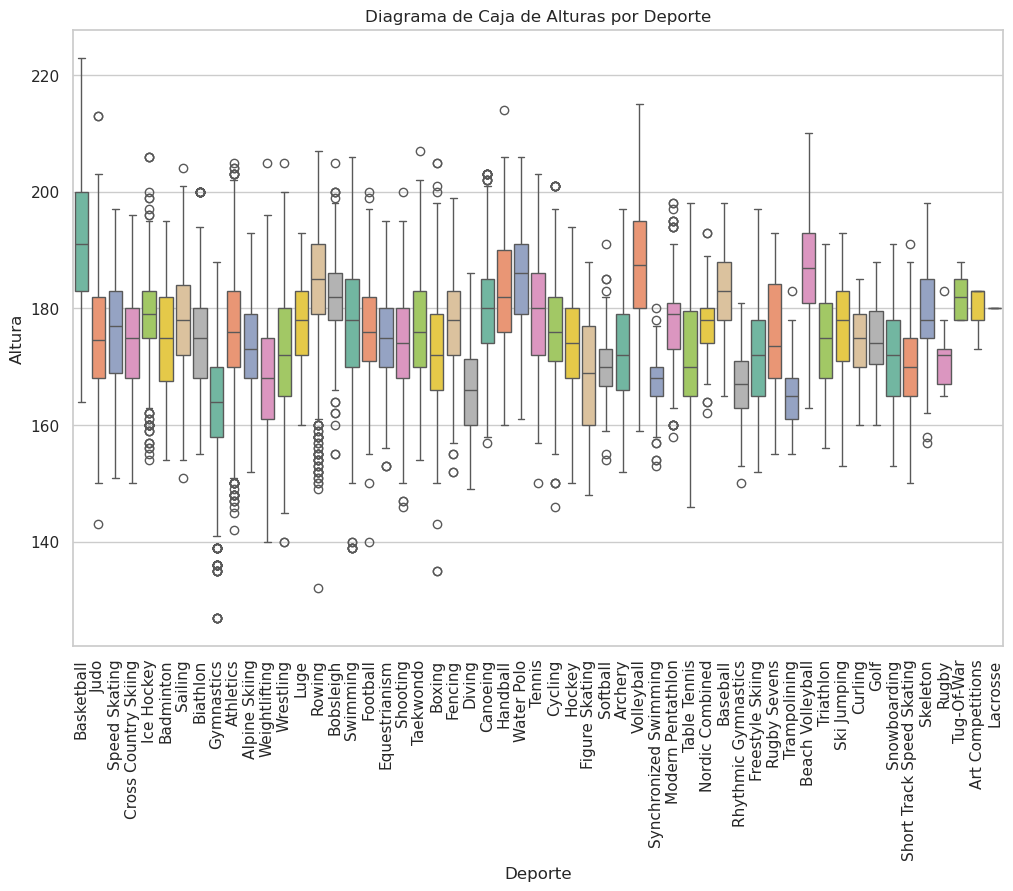

In [ ]:
dataset_with_medals = dataset[dataset["Medal"].notna()]

plt.figure(figsize=(12, 8))
sns.boxplot(x="Sport", y="Height", data=dataset_with_medals, palette="Set2")
plt.xticks(rotation=90)
plt.xlabel("Deporte")
plt.ylabel("Altura")
plt.title("Diagrama de Caja de Alturas por Deporte")
plt.show()

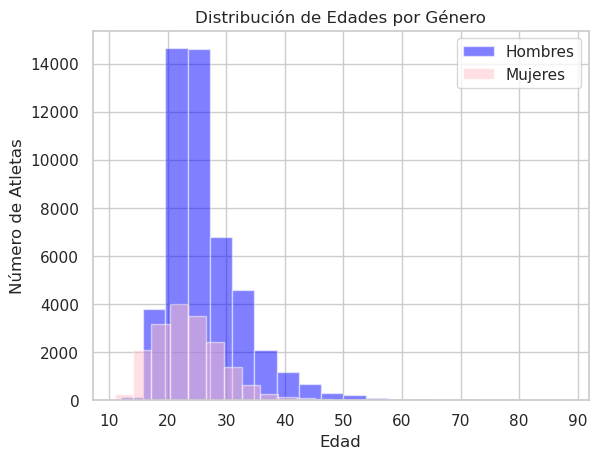

In [ ]:
dataset = pd.read_csv("/home/luis/Downloads/dataset_olympics.csv", sep=',')
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv")
data_male = dataset[dataset["Sex"] == "M"]
data_female = dataset[dataset["Sex"] == "F"]

plt.hist(data_male["Age"], bins=20, alpha=0.5, label="Hombres", color="blue")
plt.hist(data_female["Age"], bins=20, alpha=0.5, label="Mujeres", color="pink")

plt.xlabel("Edad")
plt.ylabel("Número de Atletas")
plt.legend()
plt.title("Distribución de Edades por Género")
plt.show()

# Segunda Entrega

## Librerias

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
dataset = pd.read_csv("/home/luis/Documents/AI/dataset_olympics.csv", sep=',')
#dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv", sep=',')
dataset.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
dataset = dataset.fillna(0)
dataset.replace({'Sex':{'M': 0, 'F': 1}}, inplace=True)
dataset.replace({'Medal':{'Bronze': 1, 'Silver': 2, 'Gold': 3}}, inplace=True)
dataset.replace({'Season':{'Summer': 0, 'Winter': 1}}, inplace=True)
k = 0
for i in dataset.City.unique():
  dataset.City.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Sport.unique():
  dataset.Sport.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Games.unique():
  dataset.Games.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Event.unique():
  dataset.Event.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Team.unique():
  dataset.Team.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.NOC.unique():
  dataset.NOC.replace(i, k, inplace = True)
  k = k+1
dataset.drop('Name', inplace=True, axis=1)
print("yaa")

yaa


In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])
X = dataset.values[:,:-1]
Y = dataset.values[:,-1]

print(X.shape, Y.shape)

(70000, 13) (70000,)


## GaussianNB

In [ ]:
est = GaussianNB()
XD = 0
n = 100
for i in range(n):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

  est = GaussianNB()
  est.fit(x_train,y_train)
  predictions = est.predict(x_test)
  h = accuracy_score(predictions, y_test)
  XD = XD + h
print(XD/n)

0.8548271428571428


## Desicion Tree

In [ ]:
est = DecisionTreeClassifier(max_depth=10000)

s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.833 (+/- 0.00280)
tpr      0.308 (+/- 0.02723)
tnr      0.907 (+/- 0.00275)


### Classifier

In [ ]:
def show_curveDT(criterio, n, var):
    means, stds = [], []
    nfolds_range = range(2,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        est = DecisionTreeClassifier(max_depth=nfolds, criterion=criterio)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* GINI

None


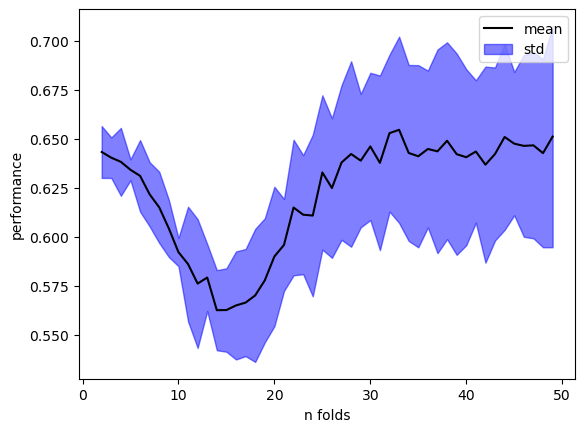

In [ ]:
show_curveDT('gini', 50, True)
#kFold variable

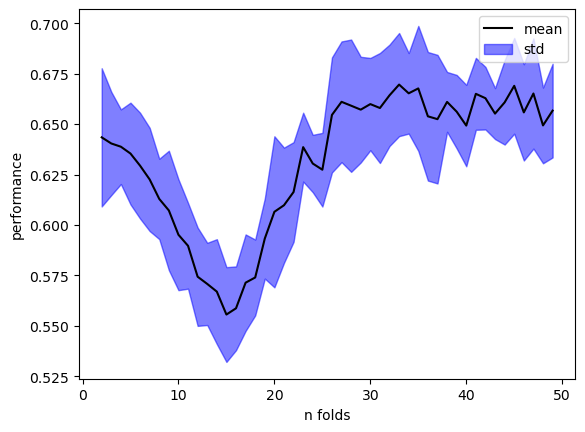

In [ ]:
show_curveDT('gini', 50, False)

* Entropy

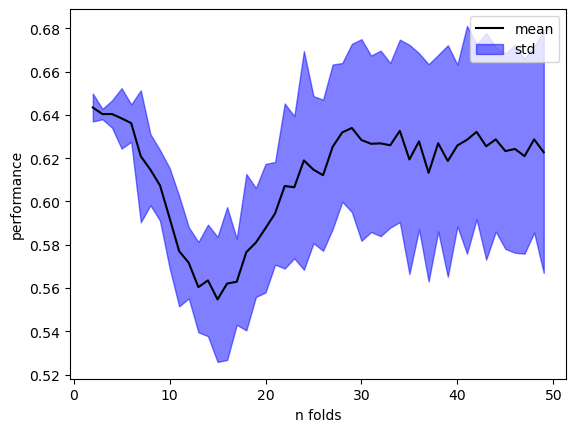

In [ ]:
show_curveDT('entropy', 50, True)

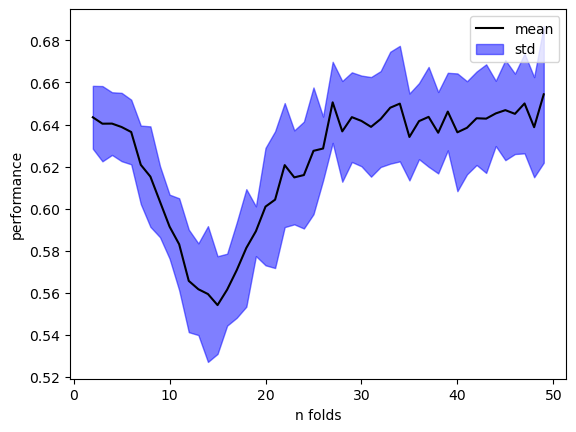

In [ ]:
show_curveDT('entropy', 50, False)

* log_loss

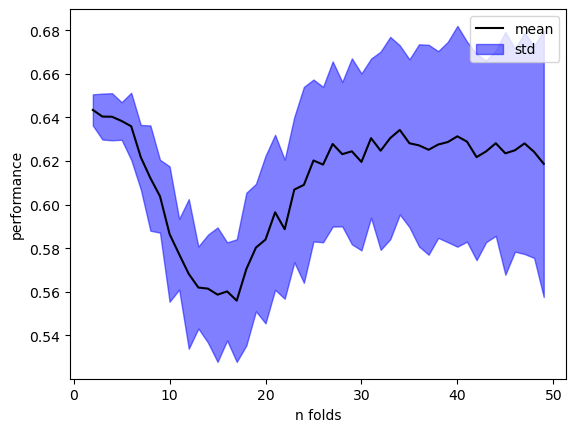

In [ ]:
show_curveDT('log_loss', 50, True)

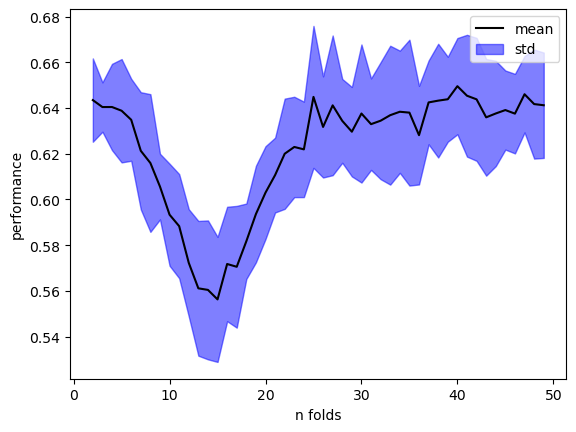

In [ ]:
show_curveDT('log_loss', 50, False)

### Regretor

In [ ]:
def show_curveDTR(criterio, n, var):
    means, stds = [], []
    nfolds_range = range(2,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        print(nfolds)
        est = DecisionTreeRegressor(max_depth=nfolds, criterion=criterio)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* squared_error

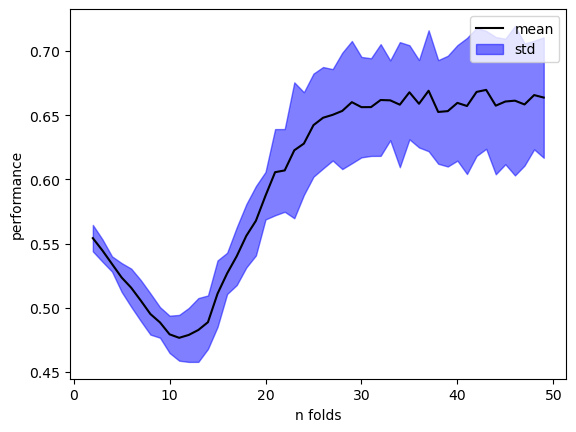

In [ ]:
show_curveDTR('squared_error', 50, True)

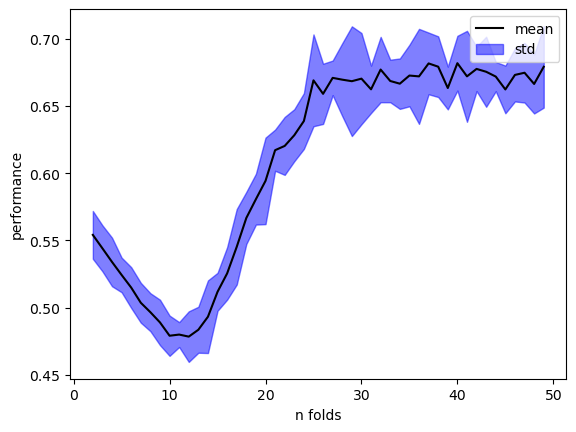

In [ ]:
show_curveDTR('squared_error', 50, False)

* friedman_mse

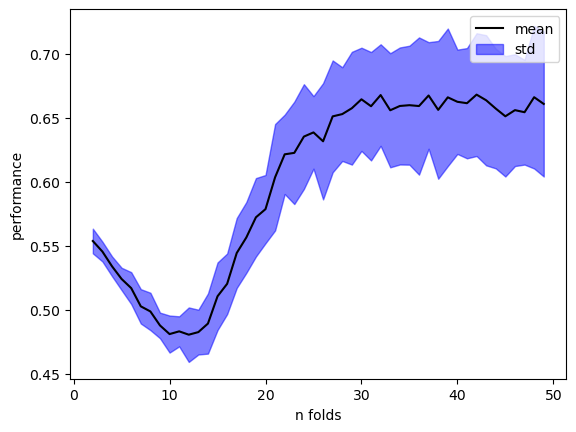

In [ ]:
show_curveDTR('friedman_mse', 50, True)

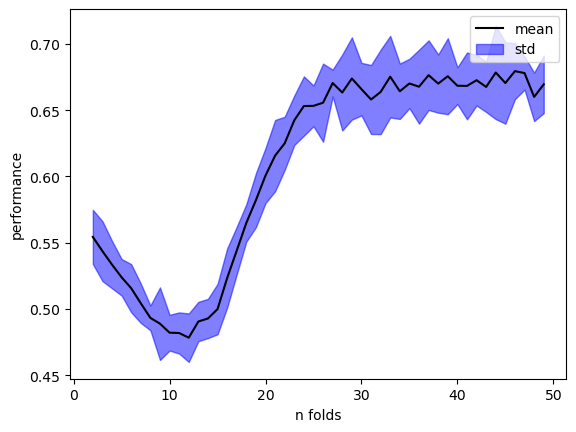

In [ ]:
show_curveDTR('friedman_mse', 50, False)

* absolute_error

2
3
4
5
6
7
8
9


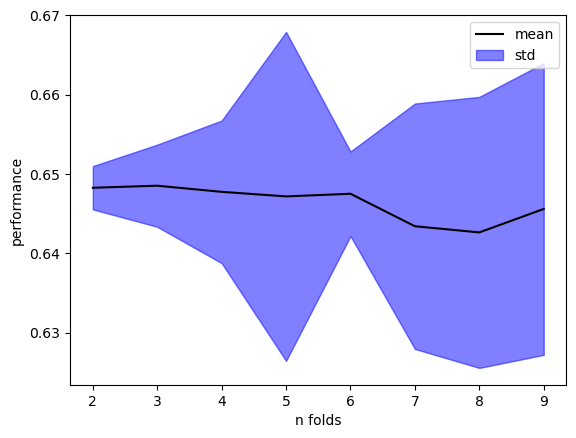

In [ ]:
show_curveDTR('absolute_error', 10, True)

2
3
4
5
6
7
8
9


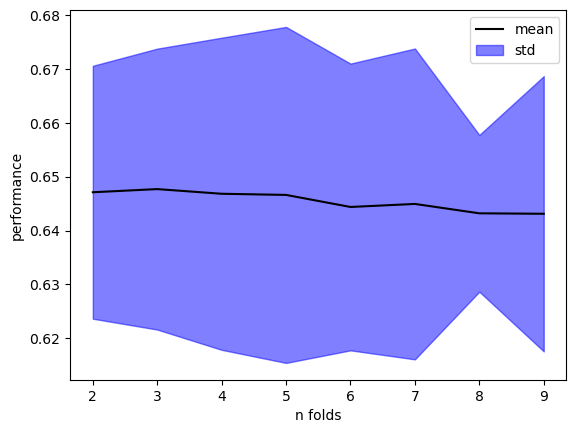

In [ ]:
show_curveDTR('absolute_error', 10, False)

* poisson

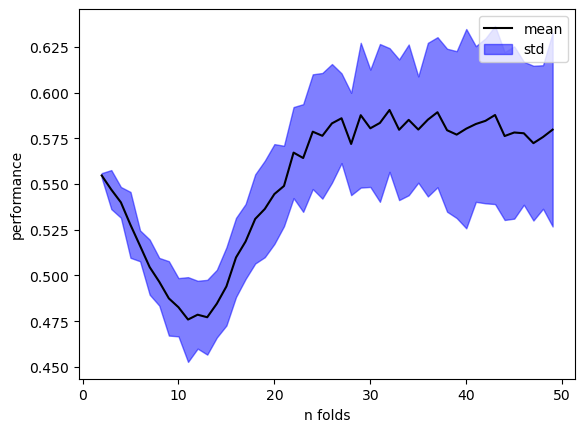

In [ ]:
show_curveDTR('poisson', 50, True)

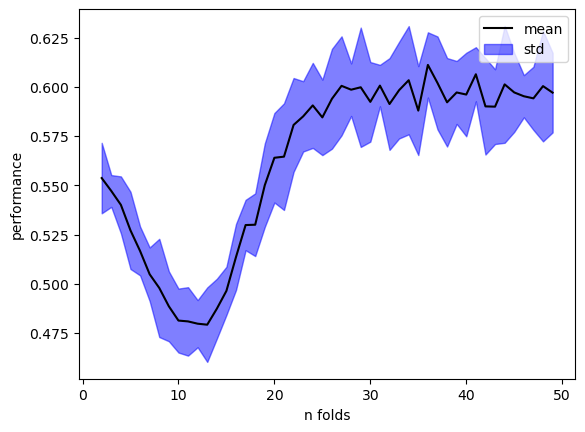

In [ ]:
show_curveDTR('poisson', 50, False)

## Random Forest

In [ ]:
est = RandomForestClassifier()

s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.875 (+/- 0.00427)
tpr      0.168 (+/- 0.02831)
tnr      0.980 (+/- 0.00211)


### Classifier

In [ ]:
def show_curveRFC(criterio, m, n, var, estm):
    means, stds = [], []
    nfolds_range = range(m,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        if(estm):
            x = nfolds
        else:
            x = 100
        print(nfolds, end=',')
        est = RandomForestClassifier(max_depth=nfolds, criterion=criterio, n_estimators=x)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* gini

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

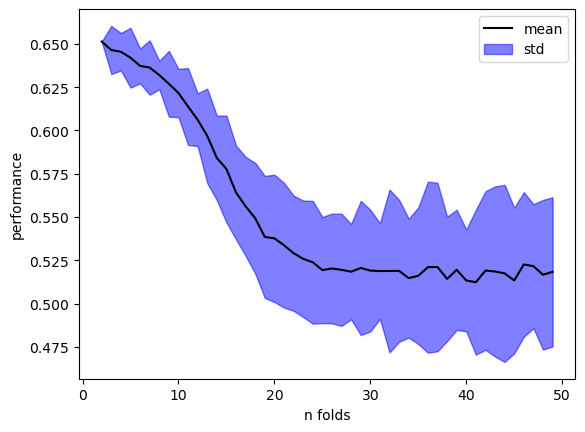

In [ ]:
show_curveRFC('gini', 2, 50, True, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

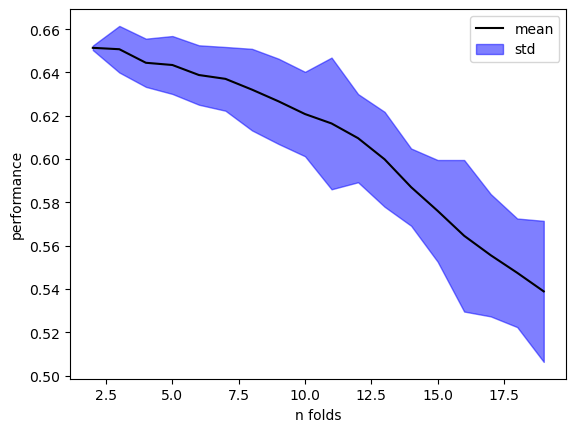

In [ ]:
show_curveRFC('gini', 2, 20, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,

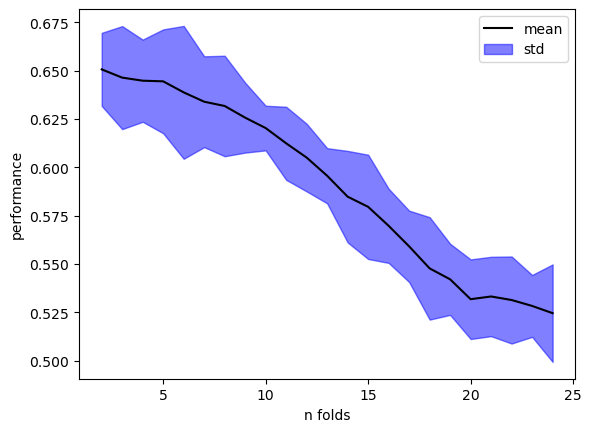

In [ ]:
show_curveRFC('gini', 2, 25, False, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,

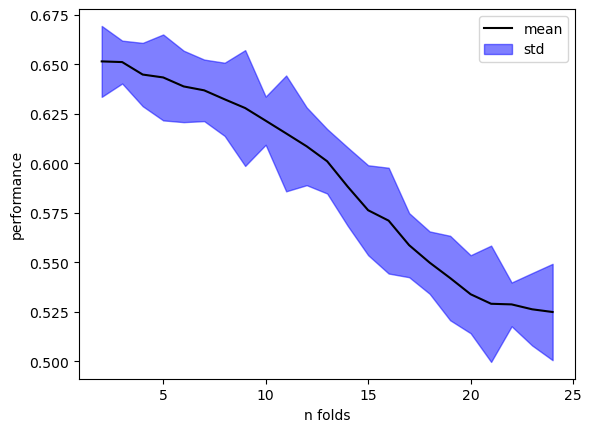

In [ ]:
show_curveRFC('gini', 2, 25, False, False)

* entropy

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,

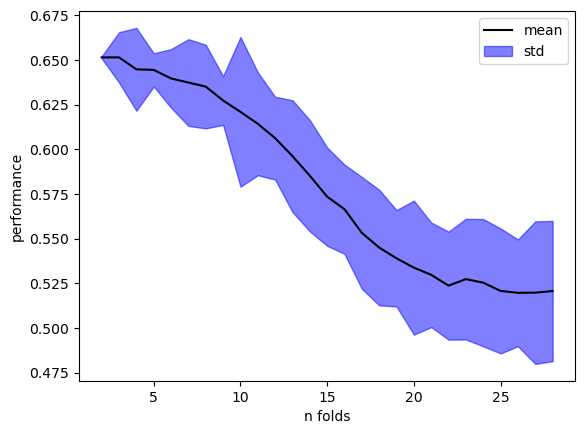

In [ ]:
show_curveRFC('entropy', 2, 29, True, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,

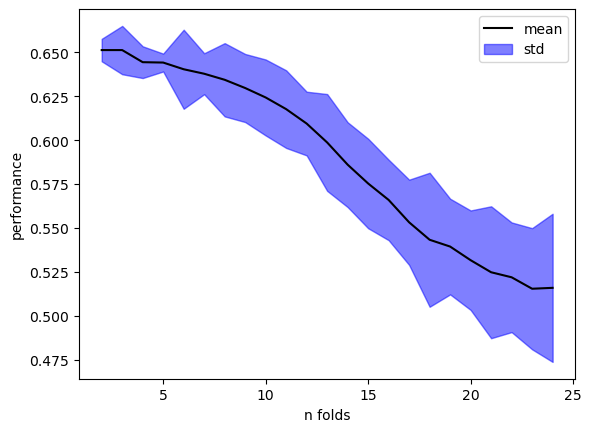

In [ ]:
show_curveRFC('entropy', 2, 25, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,

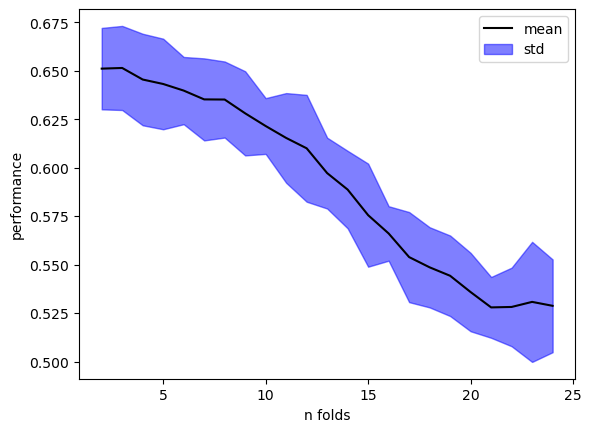

In [ ]:
show_curveRFC('entropy', 2, 25, False, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

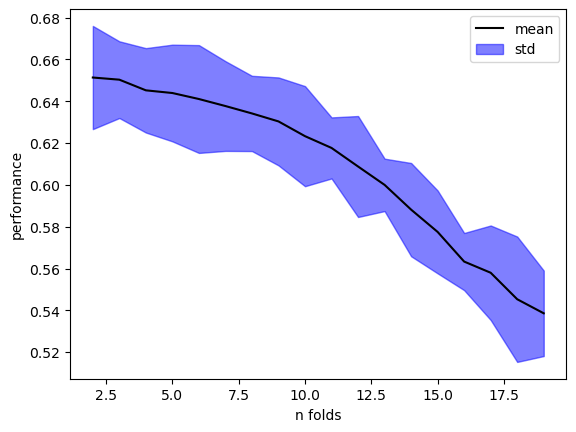

In [ ]:
show_curveRFC('entropy', 2, 20, False, False)

* log_loss

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,

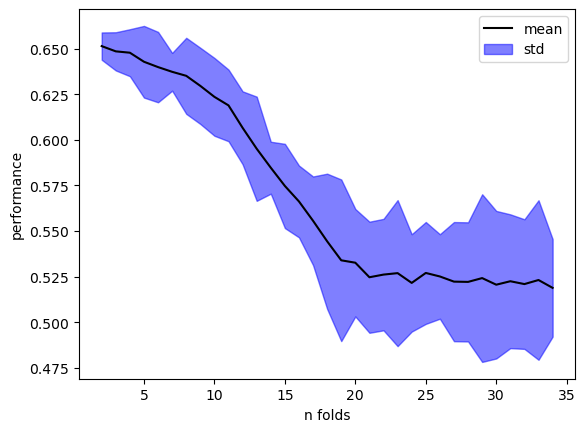

In [ ]:
show_curveRFC('log_loss', 2, 35, True, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,

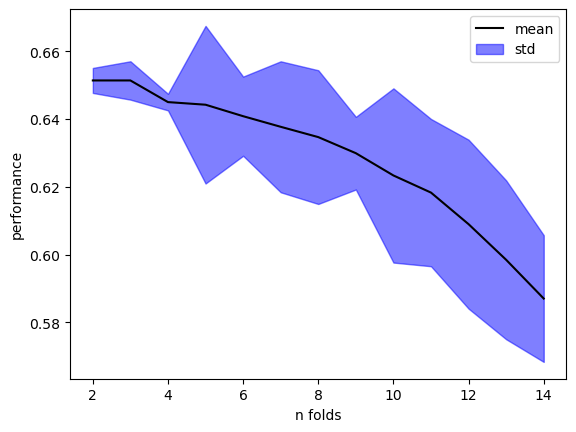

In [ ]:
show_curveRFC('log_loss', 2, 15, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,

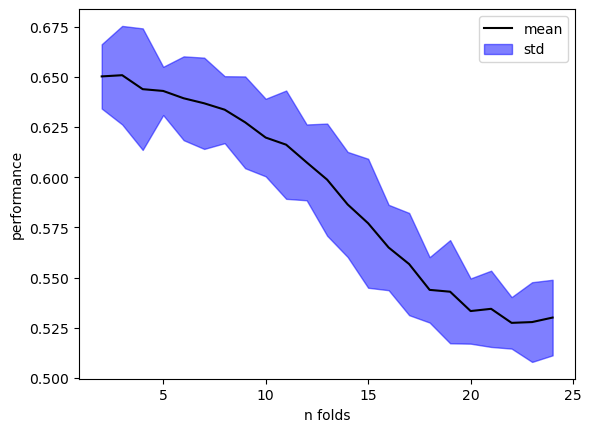

In [ ]:
show_curveRFC('log_loss', 2, 25, False, True)

In [ ]:
#show_curveRFC('log_loss', 2, 50, False, False)

### Regretor

In [ ]:
def show_curveRF(criterio, m, n, var, estm):
    means, stds = [], []
    nfolds_range = range(m,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        if(estm):
            x = nfolds
        else:
            x = 100
        print(nfolds, end=",")
        est = RandomForestRegressor(max_depth=nfolds, criterion=criterio, n_estimators=x)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* squared_error

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,

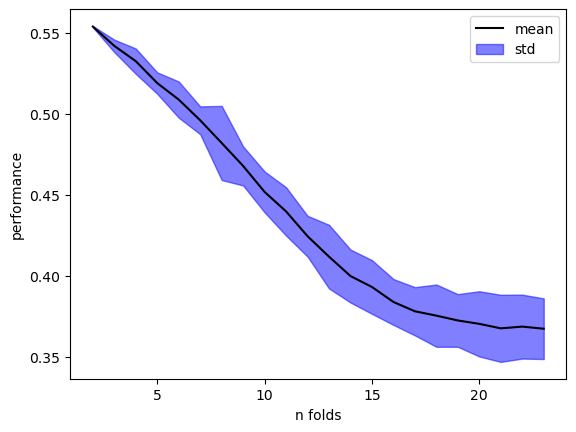

In [ ]:
show_curveRF('squared_error', 2, 24, True, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,

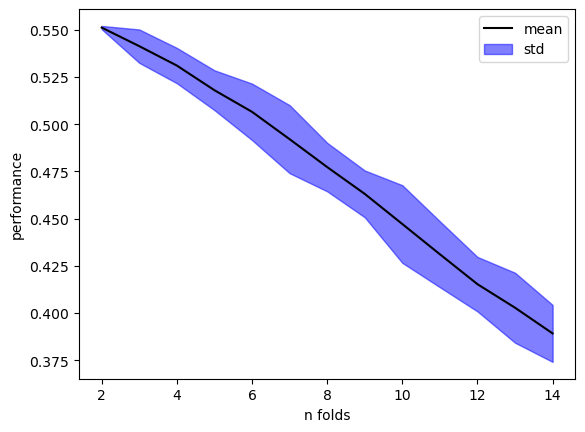

In [ ]:
show_curveRF('squared_error', 2, 15, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,

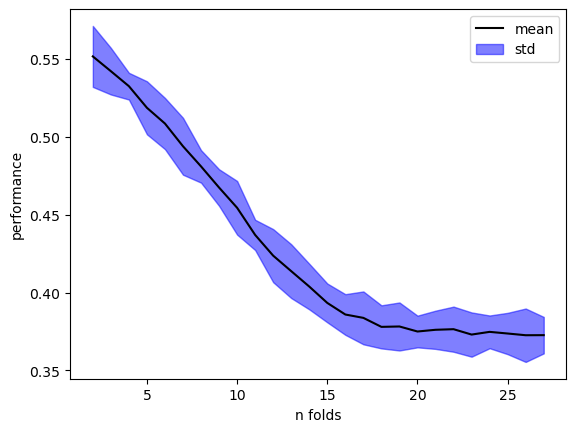

In [ ]:
show_curveRF('squared_error', 2, 28, False, True)

2,3,4,5,6,7,8,9,

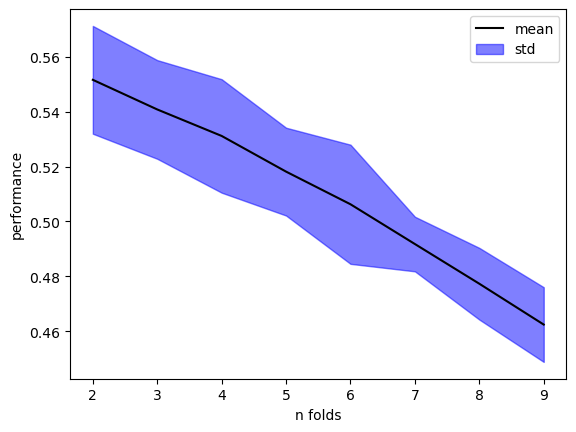

In [ ]:
show_curveRF('squared_error', 2, 10, False, False)

* absolute_error

In [ ]:
#show_curveRF('absolute_error', 2, 4, True, True)

In [ ]:
#show_curveRF('absolute_error', 2, 50, True, False)

In [ ]:
#show_curveRF('absolute_error', 2, 4, False, True)

In [ ]:
#show_curveRF('absolute_error', 2, 50, False, False)

* friedman_mse

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,

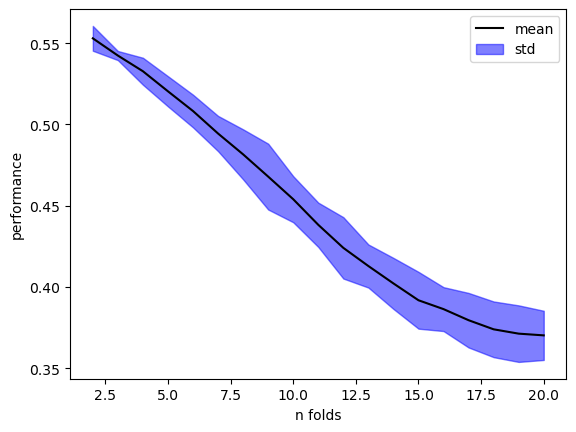

In [ ]:
show_curveRF('friedman_mse', 2, 21, True, True)

2,3,4,5,6,7,8,9,10,

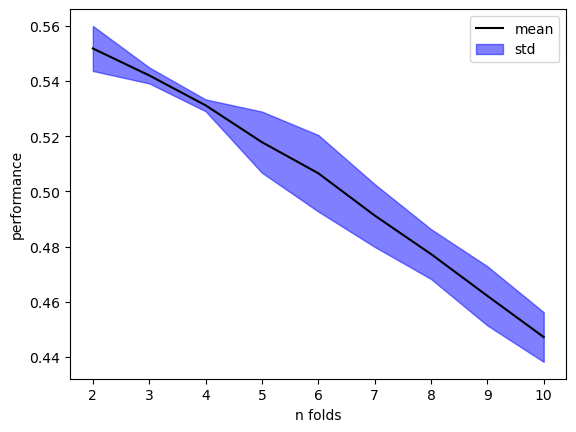

In [ ]:
show_curveRF('friedman_mse', 2, 11, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,

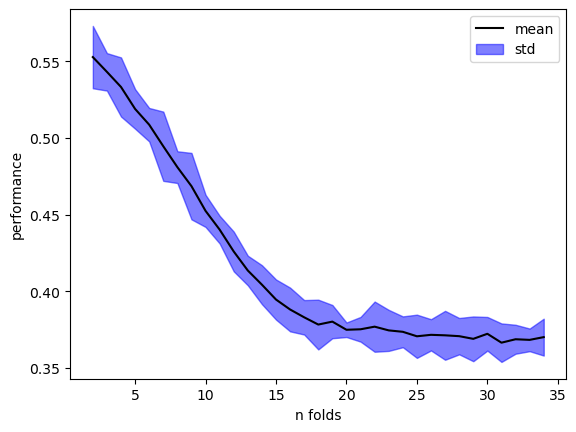

In [ ]:
show_curveRF('friedman_mse', 2, 35, False, True)

2,3,4,5,6,7,8,9,10,11,12,13,14,

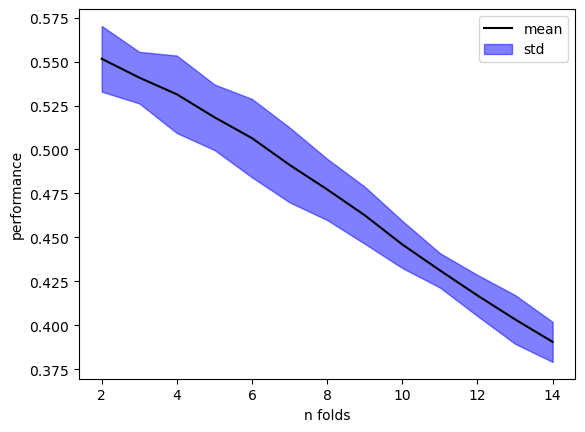

In [ ]:
show_curveRF('friedman_mse', 2, 15, False, False)

* poisson

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

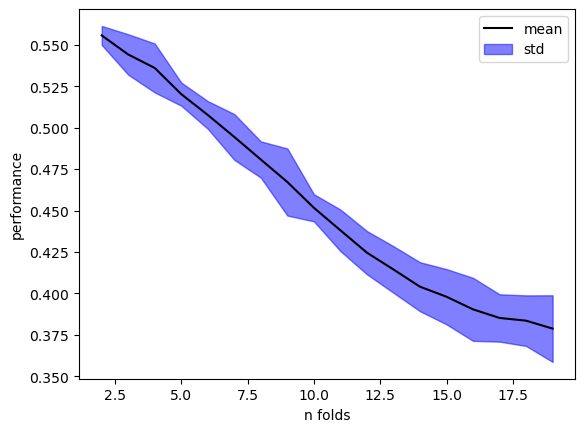

In [ ]:
show_curveRF('poisson', 2, 20, True, True)

2,3,4,5,6,7,8,9,

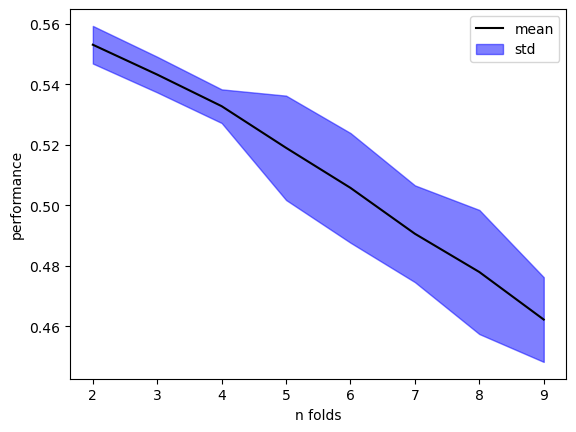

In [ ]:
show_curveRF('poisson', 2, 10, True, False)

2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,

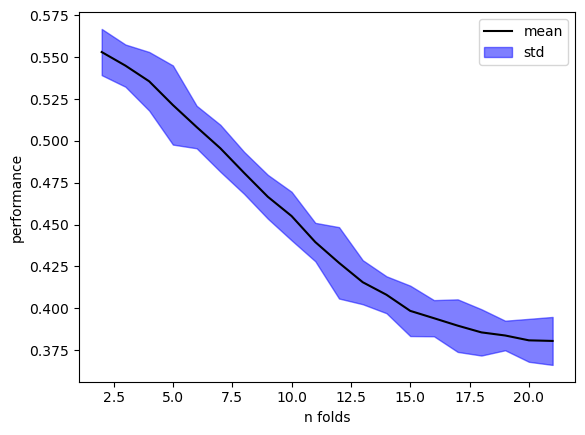

In [ ]:
show_curveRF('poisson', 2, 22, False, True)

In [ ]:
#show_curveRF('poisson', 2, 50, False, False)

## SVM

### Classifer

In [ ]:
def show_curveSVC(criterio, n, var, grado):
    means, stds = [], []
    nfolds_range = range(2,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        if(grado):
            a = 3
            if(nfolds>=3):
                a = nfolds
        else:
            a = 3
        print(nfolds, end=',')
        est = SVC(kernel=criterio, degree=a)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* Lineal

In [ ]:
est = SVC(kernel="linear")

s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [ ]:
show_curveSVC('linear', 50, True, False)

2,

In [ ]:
show_curveSVC('linear', 50, False, False)

2,

* Poly

In [ ]:
est = SVC(kernel="poly")

s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

In [ ]:
show_curveSVC('poly', 50, True, True)

2,3,4,5,

In [ ]:
show_curveSVC('poly', 50, True, False)

2,3,4,5,6,7,

In [ ]:
show_curveSVC('poly', 50, False, True)

2,

In [ ]:
show_curveSVC('poly', 50, False, False)

2,

* RBF

In [ ]:
est = SVC()

s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

2,3,4,5,6,7,8,9,10,11,12,

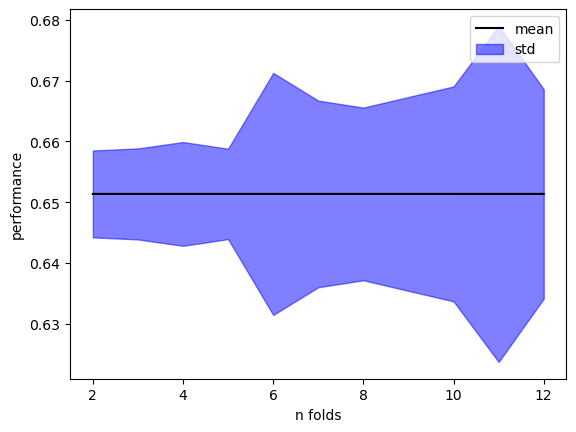

In [ ]:
show_curveSVC('rbf', 13, True, False)

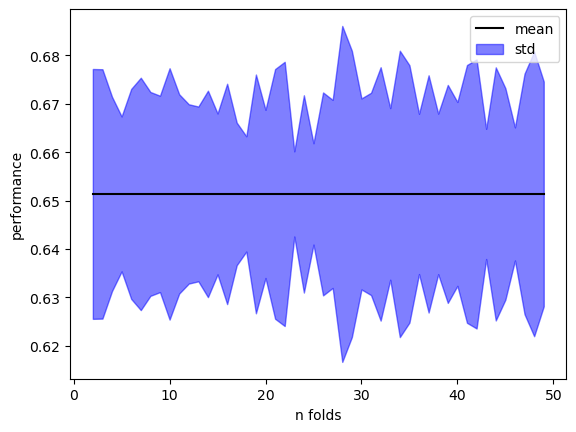

In [ ]:
show_curveSVC('rbf', 50, False, False)

### Regretor

In [ ]:
def show_curveSVR(criterio, n, var, grado):
    means, stds = [], []
    nfolds_range = range(2,n)
    for nfolds in nfolds_range:
        if(var):
            i = nfolds
        else:
            i = 10
        if(grado):
            a = 3
            if(nfolds>=3):
                a = nfolds
        else:
            a = 3
        print(nfolds, end=',')
        est = SVR(kernel=criterio, degree=a)
        s = cross_val_score(est, X, Y, cv=KFold(i, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

* linear

In [ ]:
show_curveSVR('linear', 50, True, False)

In [ ]:
show_curveSVR('linear', 50, False, False)

* poly

In [ ]:
show_curveSVR('poly', 50, True, True)

In [ ]:
show_curveSVR('poly', 50, True, False)

In [ ]:
show_curveSVR('poly', 50, False, True)

In [ ]:
show_curveSVR('poly', 50, False, False)

* RBF

In [ ]:
show_curveSVR('rbf', 50, True, False)

In [ ]:
show_curveSVR('rbf', 50, False, False)

2


KeyboardInterrupt: 

# Tercera Entrega

## Librerias

In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#dataset = pd.read_csv("/home/luis/Documents/AI/AI-Proyect/dataset_olympics.csv", sep=',')
dataset = pd.read_csv("/content/drive/MyDrive/AI/dataset_olympics.csv", sep=',')
dataset.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [ ]:
dataset = dataset.fillna(0)
dataset.replace({'Sex':{'M': 0, 'F': 1}}, inplace=True)
dataset.replace({'Medal':{'Bronze': 1, 'Silver': 2, 'Gold': 3}}, inplace=True)
dataset.replace({'Season':{'Summer': 0, 'Winter': 1}}, inplace=True)
k = 0
for i in dataset.City.unique():
  dataset.City.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Sport.unique():
  dataset.Sport.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Games.unique():
  dataset.Games.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Event.unique():
  dataset.Event.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.Team.unique():
  dataset.Team.replace(i, k, inplace = True)
  k = k+1
k = 0
for i in dataset.NOC.unique():
  dataset.NOC.replace(i, k, inplace = True)
  k = k+1
dataset.drop('Name', inplace=True, axis=1)
dataset.head(15)

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,0,24.0,180.0,80.0,0,0,0,1992,0,0,0,0,0
1,2,0,23.0,170.0,60.0,0,0,1,2012,0,1,1,1,0
2,3,0,24.0,0.0,0.0,1,1,2,1920,0,2,2,2,0
3,4,0,34.0,0.0,0.0,2,1,3,1900,0,3,3,3,3
4,5,1,21.0,185.0,82.0,3,2,4,1988,1,4,4,4,0
5,5,1,21.0,185.0,82.0,3,2,4,1988,1,4,4,5,0
6,5,1,25.0,185.0,82.0,3,2,5,1992,1,5,4,4,0
7,5,1,25.0,185.0,82.0,3,2,5,1992,1,5,4,5,0
8,5,1,27.0,185.0,82.0,3,2,6,1994,1,6,4,4,0
9,5,1,27.0,185.0,82.0,3,2,6,1994,1,6,4,5,0


In [ ]:
X = dataset.values[:,:-1]
Y = dataset.values[:,-1]

print(X.shape, Y.shape)

(70000, 13) (70000,)


## Deep Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=40)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=40)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_ohe, epochs=5, batch_size=25)

test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

probs = model.predict(X_test)
preds = np.argmax(probs, axis=1)

Epoch 1/5
2240/2240 [==============================] - 16s 6ms/step - loss: nan - accuracy: 0.8605
Epoch 2/5
2240/2240 [==============================] - 10s 4ms/step - loss: nan - accuracy: 0.8612
Epoch 3/5
2240/2240 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.8612
Epoch 4/5
2240/2240 [==============================] - 10s 4ms/step - loss: nan - accuracy: 0.8612
Epoch 5/5
438/438 [==============================] - 1s 2ms/step


## PCA

In [ ]:
mean = np.mean(dataset)
std = np.std(dataset)

standardized_data = (dataset - mean) / std
covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("eigenvalues", eigenvalues)
print("eigenvectors", eigenvectors)

eigenvalues [2.55483664 1.93915026 1.68468824 1.39814256 1.15969214 1.02194259
 0.99206814 0.94034996 0.87498321 0.58726917 0.1345765  0.09274805
 0.32870247 0.29105008]
eigenvectors [[ 1.90597757e-02  8.97967170e-03 -4.51352792e-02 -1.57141595e-01
  -4.63483375e-02 -1.06995164e-01 -9.46147626e-01 -2.43410616e-01
  -4.44846609e-02 -3.52475481e-02  3.25511139e-03  8.29713600e-05
  -3.94014438e-02  9.33932517e-04]
 [-1.54506851e-01  1.46537398e-01  2.71113055e-02 -3.53132268e-01
   5.92679756e-01 -2.58622823e-01  2.33648552e-02  7.77330161e-02
   3.53615982e-01 -4.06140611e-01 -4.11250804e-03 -1.10898619e-01
   2.67475523e-01  1.74987360e-01]
 [-1.01869088e-01  4.84524020e-02  1.41726107e-02 -1.16326634e-01
  -5.88031804e-01  1.85031330e-01 -2.36678988e-02  5.96330498e-02
   7.57606458e-01 -1.03351926e-01  2.64840071e-02  8.36029599e-03
   3.91511195e-02  4.95455971e-02]
 [-5.72463992e-01 -1.54078490e-01  3.66006083e-02  2.68698439e-02
  -4.38818578e-02 -9.21921178e-02 -1.89732424e-04 -6

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
order_of_importance = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
k = 13
reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:,:k])

print(reduced_data)

             0         1         2         3         4         5         6   \
0     -1.185196  1.482735  1.047120  2.902011  0.169870  0.319589  1.160685   
1     -1.100533  1.552913  1.027101  2.769721  0.375436  0.400034  1.193319   
2      2.882954  1.830206  0.962605  2.517514  0.312787  0.511996  1.220196   
3      3.203281  1.827874  1.488897  1.951385 -1.723876 -1.881192  0.994867   
4     -1.630700  1.178656  1.153411  1.239880  1.978472  1.387607  0.745921   
...         ...       ...       ...       ...       ...       ...       ...   
69995  2.249353 -1.396853 -0.896276 -0.310986  0.771985  1.670125 -2.088542   
69996  2.249255 -1.395568 -0.896188 -0.315386  0.772342  1.669660 -2.087697   
69997 -0.098362 -2.009881  0.205507  0.237968 -0.106338 -0.299633 -1.638560   
69998 -0.200274 -2.176976  0.211214  0.453167 -0.402768 -0.172105 -1.702388   
69999 -1.071923  0.122639 -1.483703 -1.642843 -0.770625  1.785022 -1.609105   

             7         8         9         10      

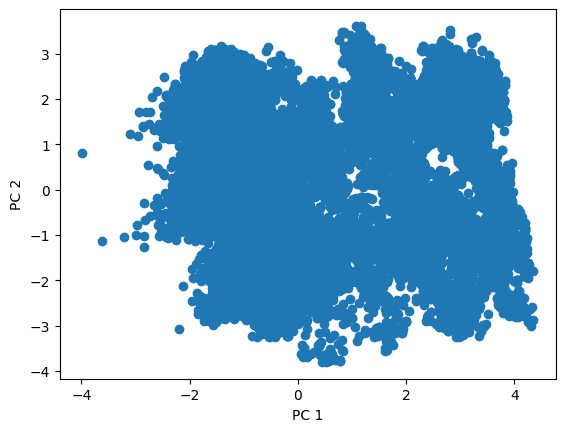

In [ ]:
plt.scatter(reduced_data[0], reduced_data[1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

In [ ]:
total_explained_variance = sum(explained_variance[:k])

print(explained_variance)

print("total_explained_variance (k=11):", total_explained_variance)

[0.18248572 0.13850875 0.12033316 0.0998659  0.08283397 0.07299486
 0.070861   0.06716689 0.06249791 0.0419472  0.02347841 0.02078899
 0.00961247 0.00662477]
total_explained_variance (k=11): 0.9933752342439245


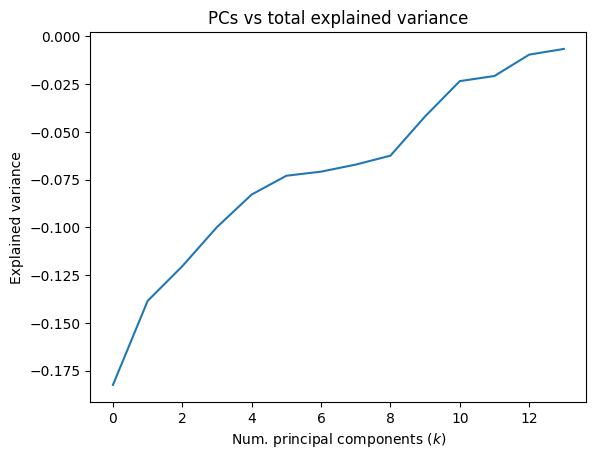

In [ ]:
plt.plot(-1*explained_variance)
plt.title("PCs vs total explained variance")
plt.xlabel("Num. principal components ($k$)")
plt.ylabel("Explained variance")
plt.show()